The goal is to develop a predictive model using decision trees and ensemble techniques. This model aims to predict whether an individual applying for a loan is more likely to be categorized as a defaulter or a non-defaulter. It will take into consideration a variety of independent variables, including checking status, credit history, loan duration, purpose, credit amount, and other pertinent factors. For more on Dataset: https://datahub.io/machine-learning/credit-g#data

**Activities:**


1. Data Pre-processing
2. Building ML Model:

  a)  Decision Trees

  b)  Regularization to Prune Decision Tree

  c) Ensemble Models
    
  i) Bagging

  ii) AdaBoosting

  iii) GradientBoost

  iv) XGBoost

  v) Random Forest










**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [ ]:
CreditData = pd.read_csv("/content/drive/MyDrive/Data Science/Credit_Eligibility_Analysis/credit-g_csv.csv")

In [ ]:
CreditData.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [ ]:
CreditData.shape

(1000, 21)

In [ ]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

Many coloumns are of dtype object (Strings). They should be converted to categorical Variables.

In [ ]:
for Object_Variable in CreditData.columns:
  if CreditData[Object_Variable].dtype == 'object':
    CreditData[Object_Variable] = pd.Categorical(CreditData[Object_Variable])
CreditData.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [ ]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
for Object_Variable in CreditData.columns:
    if CreditData[Object_Variable].dtype == 'category':
        print(Object_Variable)
        print(CreditData[Object_Variable].value_counts())
        print()

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

personal_status
mal

In [ ]:
replaceStruct = {
    "checking_status": {"no checking":0, "<0":1, "0<=X<200":2, ">=200":3},
    "credit_history": {"existing paid": 0, "critical/other existing credit":1, "delayed previously": 2, "all paid":3, "no credits/all paid":4},
    "savings_status": {"<100": 0, "no known savings": 1, "100<=X<500":2, "500<=X<1000": 3, ">=1000":4},
    "employment": {"1<=X<4": 0, ">=7":1, "4<=X<7":2, "<1":3, "unemployed": 4},
    "property_magnitude": {"car":0, "real estate":1, "life insurance":2, "no known property":3},
    "housing": {"own":0, "rent":1, "for free":2},
    "own_telephone": {"none":0, "yes":1},
    "foreign_worker": {"yes":1, "no":0},
    "class": {"good":1, "bad":0}
}

#columns with no order are below
oneHotCols=["purpose","personal_status", "other_parties", "other_payment_plans", "job"]

In [ ]:
CreditData=CreditData.replace(replaceStruct)
CreditData=pd.get_dummies(CreditData, columns=oneHotCols)
CreditData.head(10)

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,residence_since,property_magnitude,age,...,other_parties_co applicant,other_parties_guarantor,other_parties_none,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,1,6,1,1169,1,1,4,4,1,67,...,0,0,1,0,1,0,0,1,0,0
1,2,48,0,5951,0,0,2,2,1,22,...,0,0,1,0,1,0,0,1,0,0
2,0,12,1,2096,0,2,2,3,1,49,...,0,0,1,0,1,0,0,0,0,1
3,1,42,0,7882,0,2,2,4,2,45,...,0,1,0,0,1,0,0,1,0,0
4,1,24,2,4870,0,0,3,4,3,53,...,0,0,1,0,1,0,0,1,0,0
5,0,36,0,9055,1,0,2,4,3,35,...,0,0,1,0,1,0,0,0,0,1
6,0,24,0,2835,3,1,3,4,2,53,...,0,0,1,0,1,0,0,1,0,0
7,2,36,0,6948,0,0,2,2,0,35,...,0,0,1,0,1,0,1,0,0,0
8,0,12,0,3059,4,2,2,4,1,61,...,0,0,1,0,1,0,0,0,0,1
9,2,30,1,5234,0,4,4,2,0,28,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   checking_status                     1000 non-null   category
 1   duration                            1000 non-null   int64   
 2   credit_history                      1000 non-null   category
 3   credit_amount                       1000 non-null   int64   
 4   savings_status                      1000 non-null   category
 5   employment                          1000 non-null   category
 6   installment_commitment              1000 non-null   int64   
 7   residence_since                     1000 non-null   int64   
 8   property_magnitude                  1000 non-null   category
 9   age                                 1000 non-null   int64   
 10  housing                             1000 non-null   category
 11  existing_credits               

#Splitting Data

In [ ]:
X = CreditData.drop('class', axis=1)
y = CreditData.pop('class')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

#Building Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
print(dTree.score(X_train,y_train))

1.0


In [ ]:
dTree.score(X_test, y_test)

0.6966666666666667

#Visualizing the Decision Tree

In [ ]:
!pip install graphviz

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

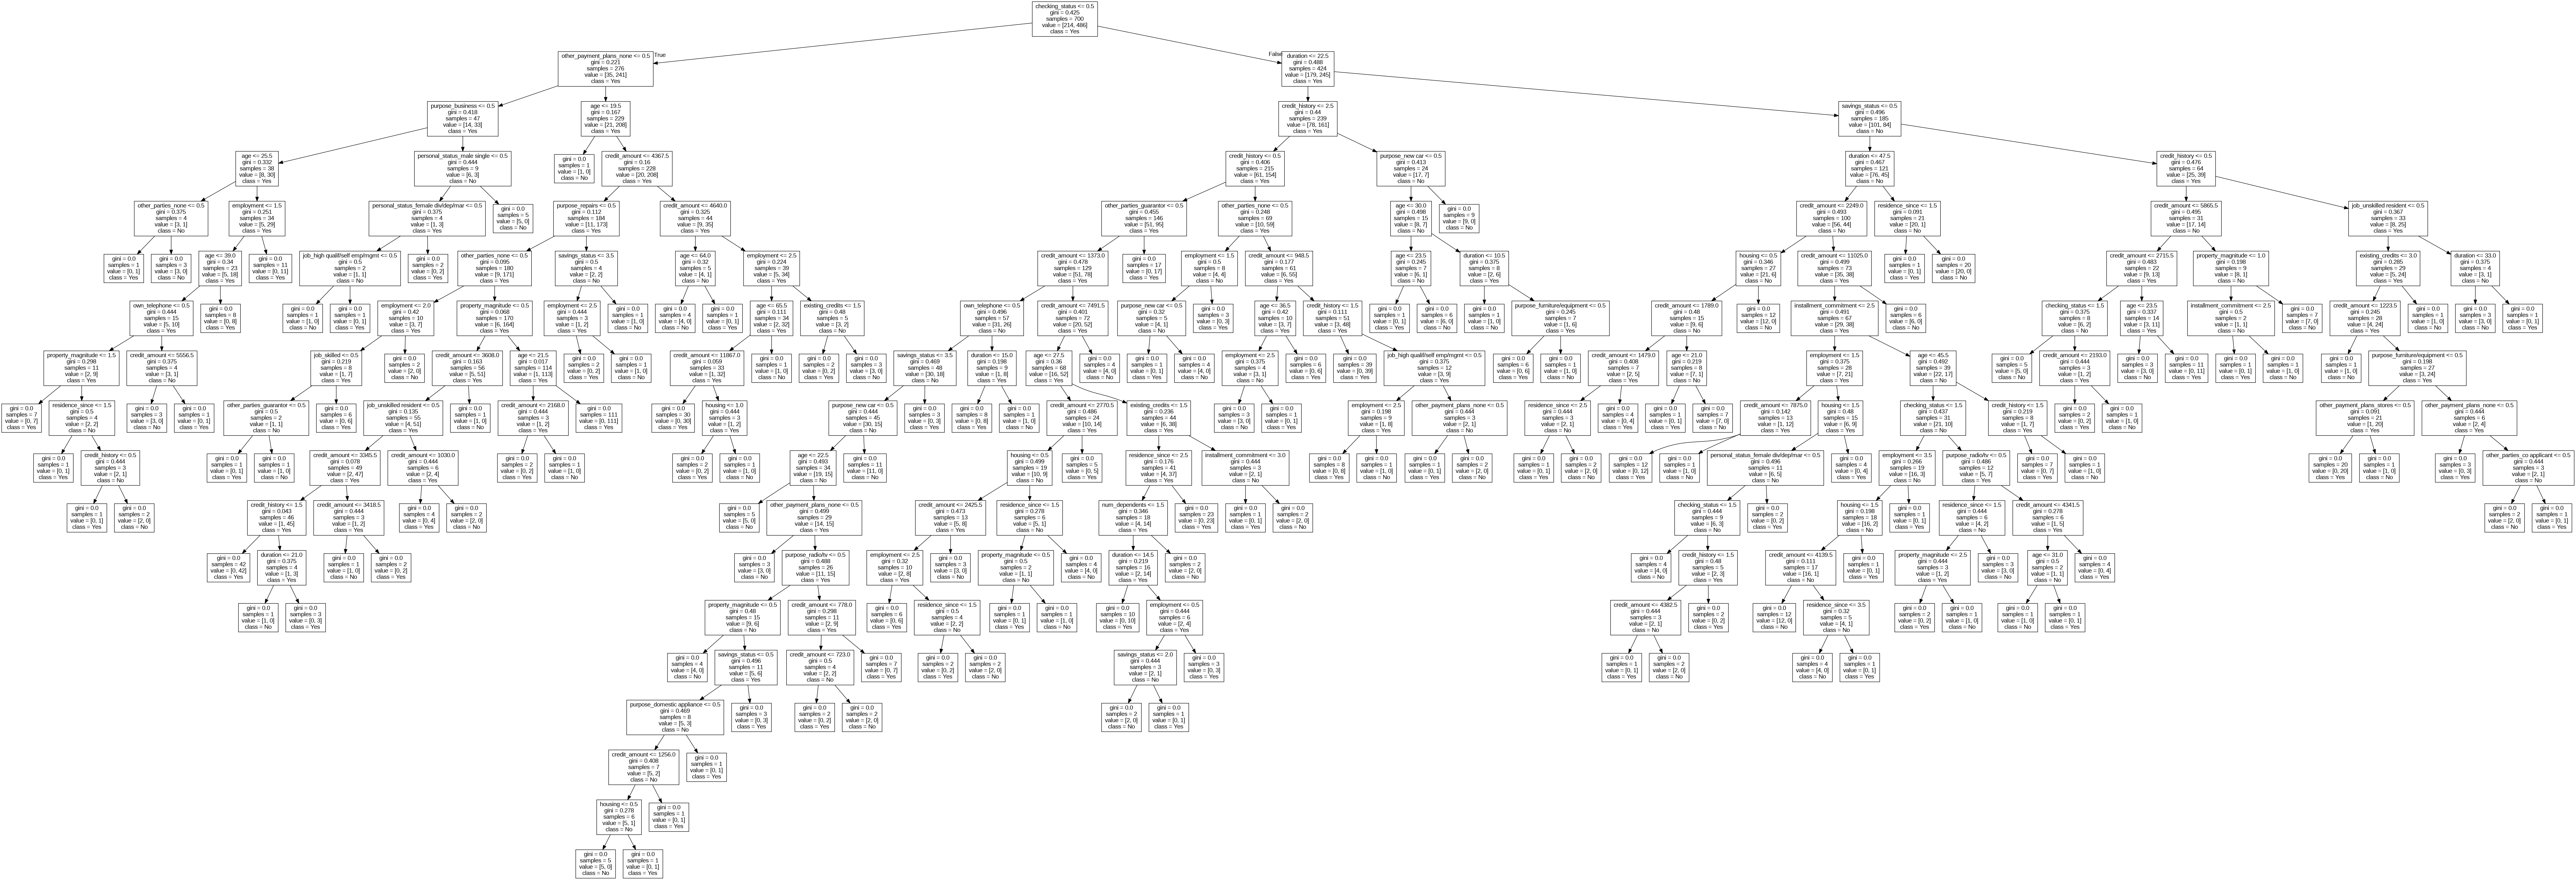

In [ ]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

#Prunning

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7585714285714286
0.75


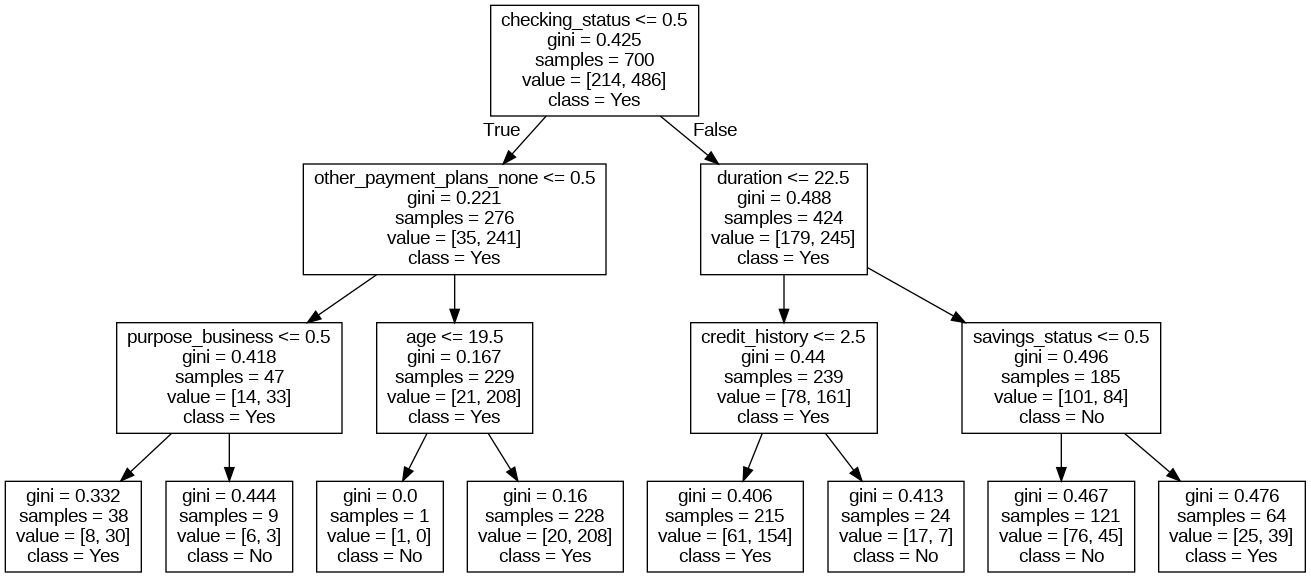

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


In [ ]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = X_train.columns))

                                    Importance
checking_status                       0.488320
duration                              0.168362
credit_history                        0.130337
credit_amount                         0.000000
savings_status                        0.079042
employment                            0.000000
installment_commitment                0.000000
residence_since                       0.000000
property_magnitude                    0.000000
age                                   0.027745
housing                               0.000000
existing_credits                      0.000000
num_dependents                        0.000000
own_telephone                         0.000000
foreign_worker                        0.000000
purpose_business                      0.050694
purpose_domestic appliance            0.000000
purpose_education                     0.000000
purpose_furniture/equipment           0.000000
purpose_new car                       0.000000
purpose_other

#Ensemble Learning - Bagging

0.75


<Axes: >

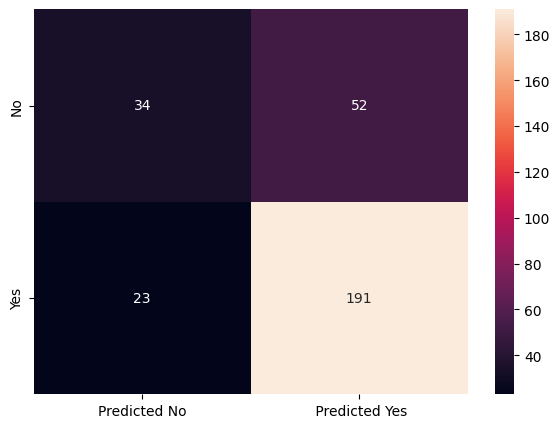

In [ ]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.78


<Axes: >

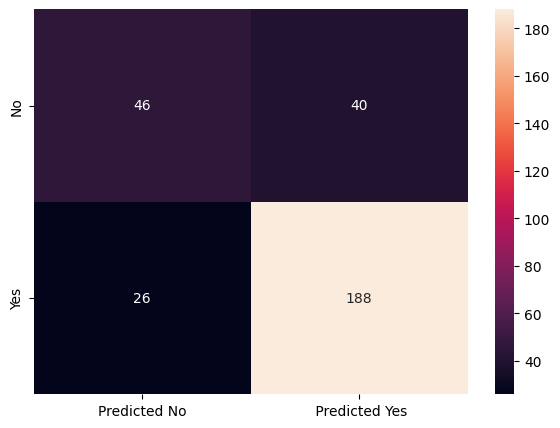

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.73


<Axes: >

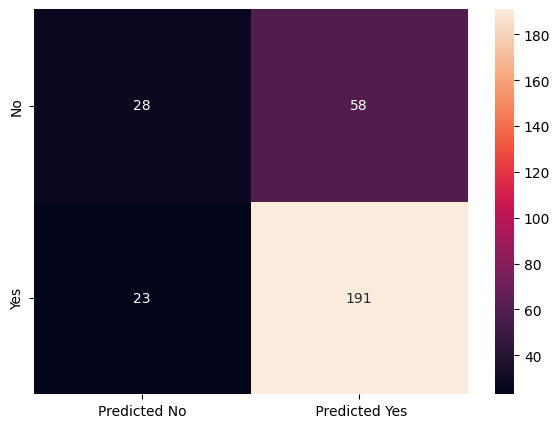

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#Ensemble Learning - GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.7433333333333333


<Axes: >

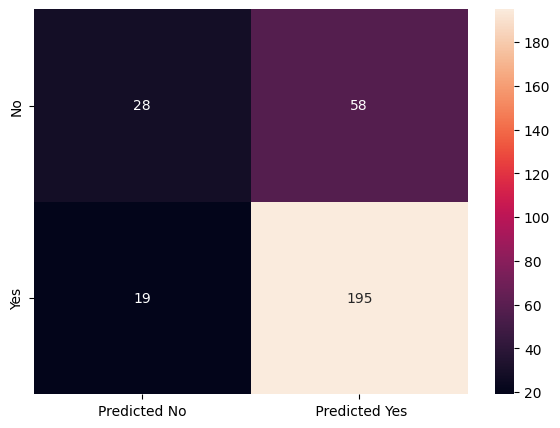

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predicted No"," Predicted Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#Ensemble Learning - XGBoost

In [ ]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   checking_status                     1000 non-null   category
 1   duration                            1000 non-null   int64   
 2   credit_history                      1000 non-null   category
 3   credit_amount                       1000 non-null   int64   
 4   savings_status                      1000 non-null   category
 5   employment                          1000 non-null   category
 6   installment_commitment              1000 non-null   int64   
 7   residence_since                     1000 non-null   int64   
 8   property_magnitude                  1000 non-null   category
 9   age                                 1000 non-null   int64   
 10  housing                             1000 non-null   category
 11  existing_credits               

#Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 200, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.7633333333333333


<Axes: >

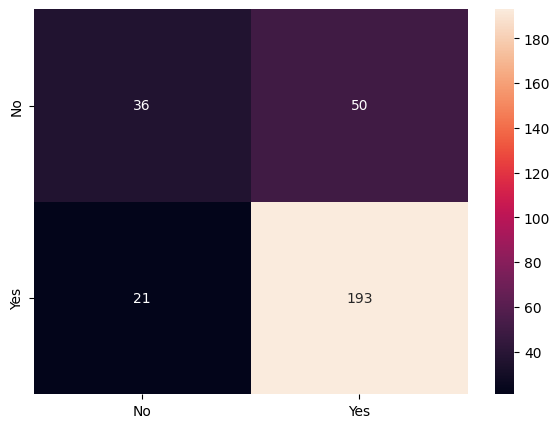

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')